In [1]:
from mcp_persor import BVHparser
from mcp_persor import plot
from matplotlib import pyplot as plt


In [2]:
def plot_pos(df):
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(df['time'].min(), df['time'].max())
    fig, ax = plt.subplots()
    sc = ax.scatter(df['root_Xposition'], df['root_Zposition'], c=df['time'], cmap=cmap, norm=norm)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Time')

    for p in df[['time', 'root_Xposition', 'root_Yposition', 'root_Zposition']].itertuples():
        color = cmap(p[1] / df['time'].max())
        plt.plot(p[2], p[4], marker='.', color=color)
    plt.show()


In [3]:
bvhp = BVHparser('../1129-1205/log/lower_body.bvh')

init_pos = bvhp.get_initial_position()
init_pos[0] = 0
init_pos[2] = 0
bvhp.set_initial_position(init_pos)
bvhp.to_bvh('./output.bvh')


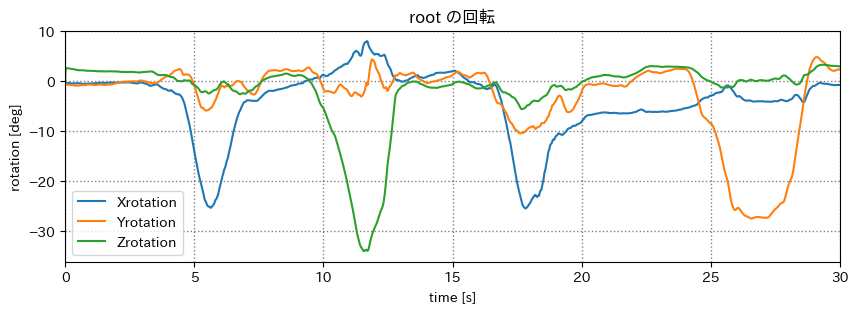

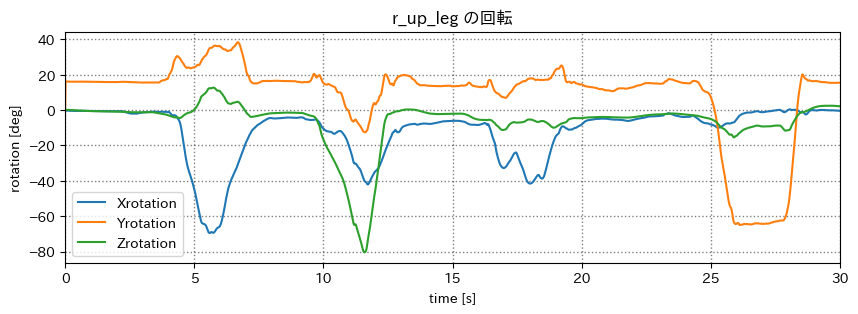

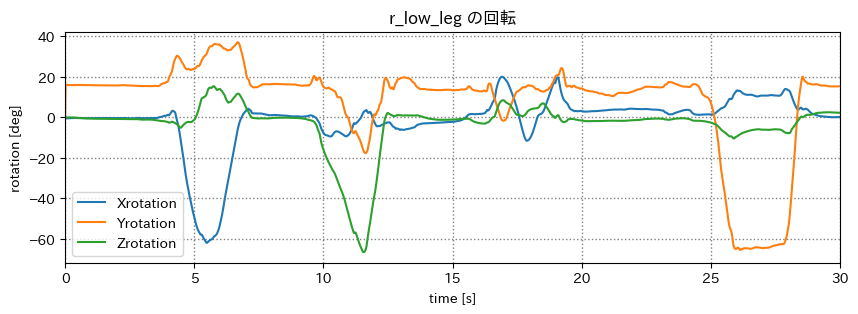

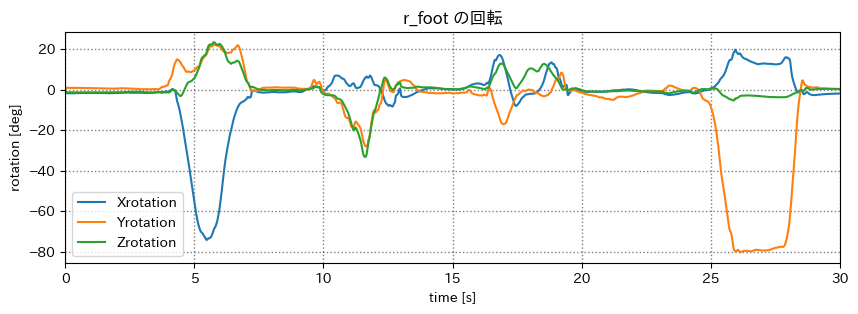

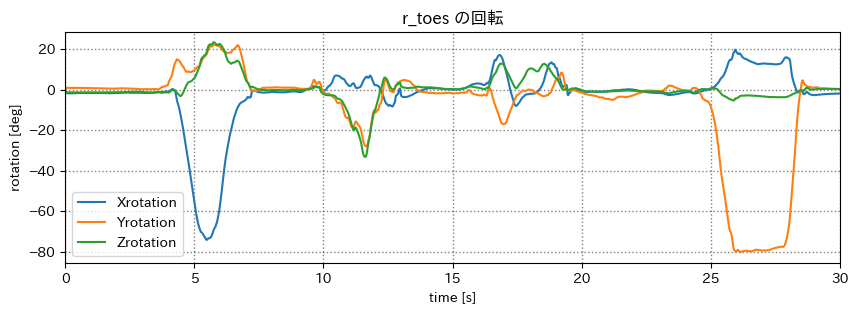

In [4]:
joints = bvhp.get_skeleton_path2root('r_toes')
for joint_name in reversed(joints):
    motion_df = bvhp.get_joint_motion_df(joint_name, mode='absolute')

    plot(
        df=motion_df,
        heads=[
            ['time', 'Xrotation'],
            ['time', 'Yrotation'],
            ['time', 'Zrotation']
        ],
        title=f'{joint_name} の回転',
        xlabel='time [s]',
        ylabel='rotation [deg]',
        xlim=(0, 30),
        ylim=(0, 0),
        grid=True,
    )
